In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
data_path = "./Data2.csv"
df = pd.read_csv(data_path)
df

,karma,networkExp,bedwars_beds,bedwars_bedwars_challenger,bedwars_bedwars_killer,bedwars_collectors_edition,bedwars_level,bedwars_loot_box,bedwars_slumber_ticket_master,bedwars_wins,...,void_final_kills_bedwars,void_kills_bedwars,wins_bedwars,Cheat,fkdr,wlr,bblr,fk_lev,bb_lev,kill_lev
0,5835.0,284279.0,210.0,0.0,294.0,135.0,10.0,1.0,0.0,16.0,...,108.0,199.0,16.0,0,1.283843,0.064516,1.288344,29.400000,40.400000,21.000000
1,45.0,562261.0,116.0,0.0,178.0,117.0,14.0,16.0,0.0,12.0,...,75.0,195.0,12.0,0,0.461140,0.031250,0.316940,12.714286,30.571429,8.285714
2,76995.0,987634.0,64.0,0.0,177.0,38.0,7.0,5.0,0.0,21.0,...,31.0,102.0,21.0,0,0.858491,0.168000,0.656250,13.000000,35.142857,9.000000
3,1820.0,88887.0,74.0,0.0,90.0,39.0,4.0,0.0,0.0,12.0,...,30.0,32.0,12.0,0,1.833333,0.235294,1.897436,22.000000,22.500000,18.500000
4,0.0,370378.0,56.0,0.0,154.0,479.0,18.0,7.0,0.0,25.0,...,23.0,236.0,25.0,0,0.226257,0.071839,0.158640,4.500000,40.777778,3.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4673,3404.0,867335.0,299.0,7.0,701.0,811.0,1.0,0.0,8883.0,260.0,...,255.0,946.0,260.0,1,701.000000,260.000000,299.000000,701.000000,1952.000000,299.000000
4674,25.0,246419.0,36.0,0.0,161.0,969.0,1.0,3.0,0.0,135.0,...,38.0,357.0,135.0,1,161.000000,135.000000,36.000000,161.000000,993.000000,36.000000
4675,240.0,329007.0,14.0,0.0,129.0,2186.0,1.0,2.0,96.0,79.0,...,45.0,271.0,79.0,1,129.000000,79.000000,14.000000,129.000000,692.000000,14.000000
4676,235.0,939253.0,234.0,0.0,220.0,1043.0,1.0,7.0,0.0,158.0,...,101.0,342.0,158.0,1,220.000000,158.000000,234.000000,220.000000,641.000000,234.000000


In [3]:
# value_counts = df['bedwars_level'].value_counts().reset_index()
# threshold = 10
# frequent_values = value_counts['index'][value_counts['bedwars_level'] > threshold]
# df = df[~df['bedwars_level'].isin(frequent_values)]
# df

<Axes: >

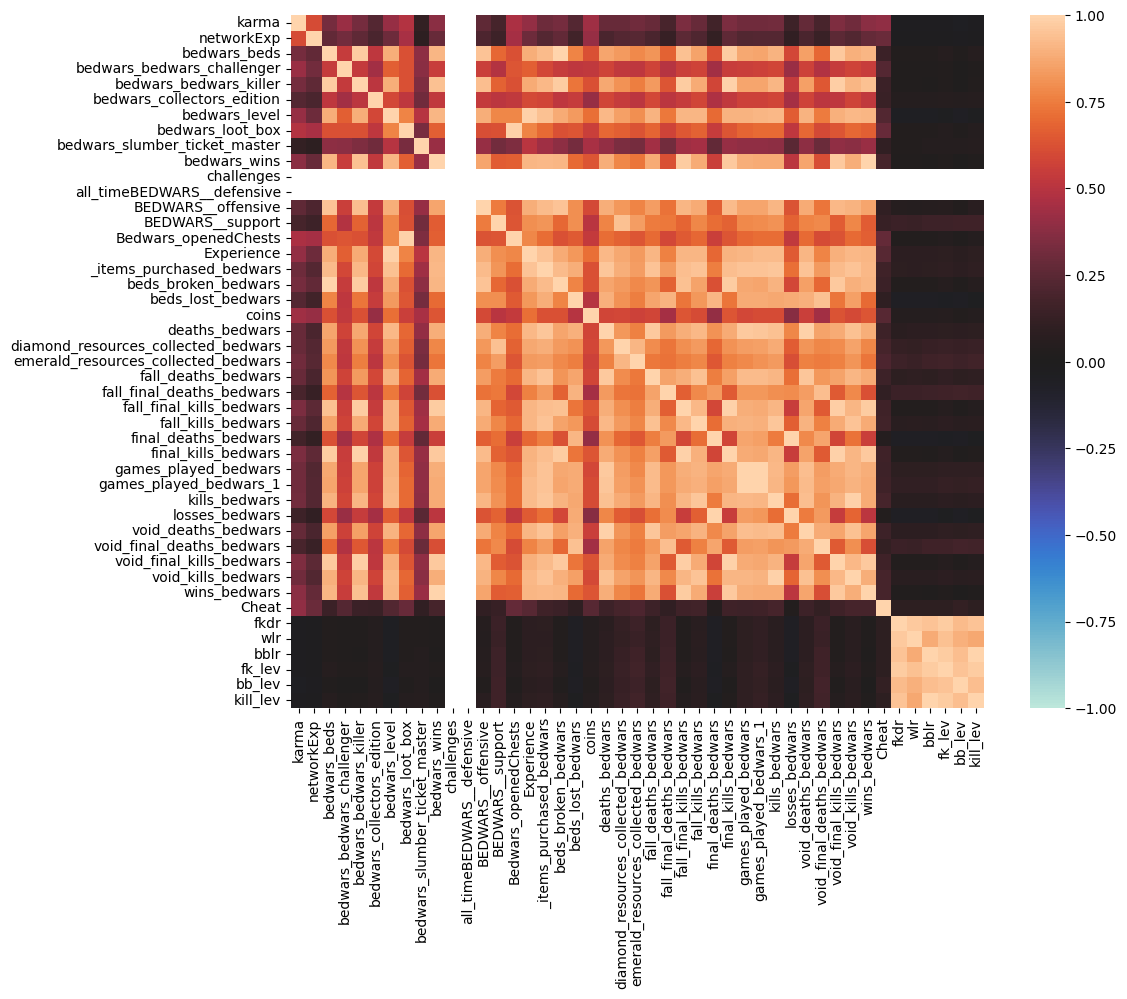

In [4]:
df_house_corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_house_corr, square=True, vmax=1, vmin=-1, center=0)

In [5]:
# X = df.drop('Cheat', axis=1)
# y = df['Cheat']

# rfecv = RFECV(estimator=RandomForestClassifier(random_state=0),
#                 step=1,
#                 cv=StratifiedKFold(5),
#                 scoring='accuracy')
# rfecv.fit(X, y)

# print("Optimal number of features : %d" % rfecv.n_features_)
# print("Selected features ranking : %s" % rfecv.ranking_)

In [6]:
# # 選択された特徴量のインデックスを取得
# selected_features_idx = np.where(rfecv.support_)[0]

# # 選択された特徴量の列名を取得
# selected_features = X.columns[selected_features_idx]

# print("Optimal number of features : %d" % rfecv.n_features_)
# print("Selected features : %s" % selected_features)

In [7]:
X = df.drop('Cheat', axis=1)
# X = df[['karma', 'networkExp', 'bedwars_bedwars_killer', 'bedwars_loot_box','BEDWARS__offensive', 'Bedwars_openedChests', 'coins','final_deaths_bedwars', 'losses_bedwars', 'wins_bedwars','fkdr','wlr','bblr','fk_lev','bb_lev','kill_lev']]
# X = df[['networkExp', 'bedwars_beds', 'bedwars_level', 'bedwars_wins', 'beds_broken_bedwars', 'beds_lost_bedwars', 'deaths_bedwars', 'diamond_resources_collected_bedwars', 'emerald_resources_collected_bedwars', 'fall_deaths_bedwars', 'final_deaths_bedwars', 'final_kills_bedwars', 'games_played_bedwars', 'games_played_bedwars_1', 'kills_bedwars', 'losses_bedwars', 'void_deaths_bedwars', 'void_final_deaths_bedwars', 'wins_bedwars']]

y = df['Cheat']

# 訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train
X_test_scaled = X_test

# model = MLPClassifier(hidden_layer_sizes=(500,500,50), max_iter=400)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 訓練データの正解率
train_accuracy = model.score(X_train_scaled, y_train)
print(f'Training Accuracy: {train_accuracy}')

# テストデータの正解率
test_accuracy = model.score(X_test_scaled, y_test)
print(f'Testing Accuracy: {test_accuracy}')

joblib.dump(model, '../models/Cheater.pkl')

Training Accuracy: 0.5299305184393373
Testing Accuracy: 0.5427350427350427


['../models/Cheater.pkl']

In [8]:
data = [
    [735.0,436149.0,110.0,0.0,320.0,64.0,13.0,1.0,0.0,31.0,0.0,0.0,22.0,21.0,0.0,56096.0,3683.0,110.0,189.0,36930.0,758.0,652.0,1022.0,9.0,3.0,1.0,13.0,187.0,164.0,219.0,219.0,534.0,183.0,362.0,80.0,47.0,255.0,31.0,0,0.8770053475935828,0.16939890710382513,0.582010582010582,12.615384615384615,41.07692307692308,8.461538461538462],
    [0.0,30868.0,26.0,0.0,68.0,8.0,2.0,0.0,0.0,6.0,0.0,0.0,7.0,1.0,0.0,1925.0,249.0,26.0,3.0,612.0,9.0,41.0,4.0,0.0,0.0,1.0,3.0,1.0,68.0,7.0,7.0,40.0,1.0,6.0,0.0,5.0,9.0,6.0,0,68.0,6.0,8.666666666666666,34.0,20.0,13.0],
    [5.0,74995.0,20.0,0.0,54.0,53.0,6.0,0.0,0.0,12.0,0.0,0.0,5.0,7.0,0.0,14028.0,1088.0,20.0,46.0,8998.0,134.0,219.0,81.0,4.0,0.0,2.0,2.0,50.0,49.0,59.0,59.0,122.0,47.0,84.0,18.0,8.0,24.0,12.0,0,0.98,0.2553191489361702,0.43478260869565216,8.166666666666666,20.333333333333332,3.3333333333333335],
    [115885.0,1141497.0,271.0,0.0,580.0,265.0,15.0,14.0,0.0,36.0,0.0,0.0,64.0,47.0,35.0,64090.0,7843.0,271.0,360.0,12756.0,1151.0,1416.0,645.0,25.0,3.0,5.0,19.0,362.0,305.0,427.0,443.0,871.0,376.0,570.0,129.0,99.0,369.0,36.0,0,0.8425414364640884,0.09574468085106383,0.7527777777777778,20.333333333333332,58.06666666666667,18.066666666666666],
    [43275.0,686458.0,108.0,1.0,273.0,168.0,12.0,4.0,0.0,83.0,0.0,0.0,27.0,12.0,12.0,47918.0,4252.0,108.0,39.0,81410.0,503.0,322.0,96.0,22.0,2.0,6.0,28.0,34.0,273.0,114.0,114.0,325.0,31.0,249.0,15.0,92.0,153.0,83.0,0,8.029411764705882,2.6774193548387095,2.769230769230769,22.75,27.083333333333332,9.0],
    [36410.0,632665.0,257.0,0.0,539.0,148.0,11.0,15.0,0.0,48.0,0.0,0.0,63.0,40.0,42.0,45204.0,7118.0,255.0,150.0,19216.0,596.0,1234.0,663.0,19.0,5.0,6.0,15.0,175.0,355.0,226.0,235.0,539.0,177.0,320.0,53.0,119.0,207.0,48.0,0,2.0285714285714285,0.2711864406779661,1.7,32.27272727272727,49.0,23.181818181818183],
    [490.0,414719.0,68.0,0.0,450.0,1044.0,20.0,19.0,0.0,105.0,0.0,0.0,8.0,31.0,48.0,89538.0,6111.0,68.0,408.0,14195.0,2232.0,1082.0,555.0,50.0,11.0,10.0,26.0,419.0,242.0,540.0,594.0,1030.0,435.0,1364.0,169.0,66.0,393.0,105.0,0,0.5775656324582339,0.2413793103448276,0.16666666666666666,12.1,51.5,3.4],
    [5.0,121678.0,22.0,0.0,68.0,20.0,4.0,3.0,0.0,5.0,0.0,0.0,5.0,3.0,9.0,6419.0,841.0,22.0,20.0,7647.0,93.0,143.0,47.0,0.0,0.0,0.0,1.0,23.0,36.0,30.0,30.0,106.0,24.0,56.0,7.0,14.0,39.0,5.0,0,1.565217391304348,0.20833333333333334,1.1,9.0,26.5,5.5],
    [10.0,146812.0,48.0,0.0,100.0,21.0,5.0,0.0,0.0,22.0,0.0,0.0,14.0,7.0,0.0,12835.0,1191.0,48.0,32.0,18571.0,108.0,144.0,69.0,2.0,1.0,3.0,7.0,28.0,93.0,54.0,54.0,141.0,32.0,49.0,8.0,15.0,50.0,22.0,0,3.3214285714285716,0.6875,1.5,18.6,28.2,9.6],
    [36940.0,1080679.0,50.0,0.0,150.0,17.0,5.0,0.0,0.0,14.0,0.0,0.0,12.0,7.0,0.0,15358.0,1493.0,50.0,72.0,6230.0,177.0,256.0,52.0,3.0,0.0,5.0,3.0,69.0,107.0,85.0,89.0,159.0,69.0,75.0,19.0,23.0,57.0,14.0,0,1.5507246376811594,0.2028985507246377,0.6944444444444444,21.4,31.8,10.0],
    [2050135.0,32785528.0,1556.0,30.0,4746.0,6382.0,143.0,165.0,0.0,680.0,0.0,0.0,209.0,260.0,476.0,691986.0,49102.0,1523.0,876.0,942793.0,4459.0,13434.0,7344.0,100.0,21.0,50.0,124.0,752.0,2759.0,1431.0,1643.0,4683.0,721.0,2587.0,326.0,774.0,1736.0,673.0,1,3.668882978723404,0.9334257975034674,1.7385844748858448,19.293706293706293,32.74825174825175,10.65034965034965],
    [19917800.0,90112043.0,366.0,0.0,494.0,488.0,33.0,80.0,0.0,94.0,0.0,0.0,19.0,21.0,214.0,154955.0,5632.0,362.0,260.0,368950.0,876.0,2406.0,1863.0,23.0,5.0,8.0,18.0,229.0,377.0,320.0,341.0,859.0,233.0,372.0,91.0,151.0,409.0,87.0,1,1.6462882096069869,0.37339055793991416,1.3923076923076922,11.424242424242424,26.03030303030303,10.969696969696969],
    [10474095.0,37487604.0,352.0,0.0,1156.0,869.0,37.0,56.0,0.0,209.0,0.0,0.0,58.0,32.0,150.0,176035.0,11219.0,328.0,278.0,438369.0,1525.0,1746.0,1271.0,37.0,6.0,11.0,54.0,254.0,699.0,462.0,551.0,1747.0,266.0,850.0,99.0,238.0,811.0,196.0,1,2.751968503937008,0.7368421052631579,1.1798561151079137,18.89189189189189,47.21621621621622,8.864864864864865],
    [84293565.0,298977556.0,11108.0,30.0,20842.0,8006.0,792.0,579.0,63491.0,3092.0,0.0,0.0,1339.0,443.0,1646.0,3860982.0,176516.0,10985.0,4170.0,8104314.0,11656.0,30500.0,22591.0,273.0,93.0,320.0,333.0,2984.0,15526.0,5966.0,6838.0,13764.0,2918.0,6427.0,1268.0,4229.0,5101.0,3009.0,1,5.203083109919571,1.0311857436600411,2.6342925659472423,19.603535353535353,17.37878787878788,13.869949494949495],
    [13377655.0,101491251.0,6739.0,0.0,22279.0,4245.0,366.0,200.0,0.0,4083.0,0.0,0.0,1069.0,295.0,489.0,1779015.0,146311.0,6700.0,1815.0,1798079.0,16640.0,20825.0,10109.0,459.0,46.0,270.0,589.0,1315.0,13227.0,5504.0,5604.0,17207.0,1379.0,8776.0,541.0,4509.0,8001.0,4079.0,1,10.058555133079848,2.9579405366207396,3.6914600550964187,36.13934426229508,47.013661202185794,18.306010928961747],
    [26274744.0,135360623.0,700.0,0.0,1121.0,8.0,43.0,59.0,0.0,278.0,0.0,0.0,12.0,14.0,111.0,202564.0,18989.0,700.0,324.0,126064.0,1294.0,3476.0,1001.0,48.0,9.0,27.0,91.0,273.0,1067.0,575.0,579.0,2367.0,296.0,645.0,100.0,415.0,955.0,278.0,1,3.9084249084249083,0.9391891891891891,2.1604938271604937,24.813953488372093,55.04651162790697,16.27906976744186],
    [65776440.0,88418176.0,1314.0,20.0,4491.0,4363.0,148.0,208.0,486.0,768.0,0.0,0.0,250.0,78.0,613.0,715984.0,33175.0,1283.0,915.0,874703.0,4486.0,4078.0,1907.0,138.0,33.0,61.0,160.0,821.0,2240.0,1542.0,1887.0,4190.0,816.0,2414.0,350.0,799.0,1983.0,699.0,1,2.728380024360536,0.8566176470588235,1.4021857923497267,15.135135135135135,28.31081081081081,8.66891891891892],
    [18488910.0,158434360.0,2962.0,30.0,12795.0,19003.0,610.0,583.0,625.0,3680.0,0.0,0.0,438.0,1789.0,1712.0,2960527.0,193986.0,2946.0,3831.0,3583622.0,23184.0,79363.0,21975.0,586.0,96.0,213.0,647.0,3453.0,7400.0,7541.0,7671.0,20564.0,3632.0,12820.0,1226.0,2371.0,9173.0,3676.0,1,2.143064002316826,1.0121145374449338,0.7689898198903681,12.131147540983607,33.71147540983606,4.829508196721312],
    [9147070.0,51881444.0,414.0,7.0,2116.0,508.0,89.0,92.0,25.0,416.0,0.0,0.0,46.0,170.0,279.0,433867.0,20527.0,414.0,652.0,666595.0,2944.0,10931.0,3751.0,93.0,19.0,33.0,147.0,570.0,1443.0,988.0,1095.0,4749.0,567.0,1618.0,224.0,518.0,2310.0,416.0,1,2.531578947368421,0.7336860670194003,0.6349693251533742,16.213483146067414,53.359550561797754,4.651685393258427],
    [21053620.0,37404988.0,6308.0,14.0,21337.0,31318.0,748.0,469.0,425.0,7350.0,0.0,0.0,982.0,306.0,1382.0,3638001.0,286611.0,6289.0,7608.0,2129826.0,48689.0,15654.0,12082.0,1774.0,208.0,352.0,963.0,6974.0,13230.0,14124.0,15050.0,22035.0,6547.0,20821.0,2184.0,5255.0,11474.0,7337.0,1,1.897046171494121,1.1206659538720025,0.8266298633017876,17.68716577540107,29.45855614973262,8.407754010695188]
]

# data = [[310, 229430.0, 58, 0, 136, 91, 8, 5, 0, 20, 0, 0, 11, 17, 14, 29017, 4132, 58, 189, 16824, 463, 682, 155, 15, 5, 0, 5, 214, 98, 241, 242, 225, 220, 234, 60, 26, 67, 20],
# [210, 428073.0, 117, 0, 192, 33, 11, 0, 0, 22, 0, 0, 27, 51, 0, 43280, 3985, 117, 187, 29180, 376, 1620, 1097, 3, 3, 2, 7, 188, 121, 241, 241, 570, 204, 235, 86, 31, 143, 22],
# [100, 212476.0, 34, 0, 118, 53, 8, 8, 0, 20, 0, 0, 5, 37, 21, 28012, 2096, 34, 95, 1889, 222, 939, 414, 2, 3, 2, 3, 99, 62, 125, 125, 224, 103, 106, 31, 16, 61, 20],
# [375, 581370.0, 33, 0, 141, 231, 9, 11, 0, 20, 0, 0, 5, 36, 33, 36527, 2519, 33, 134, 46902, 495, 915, 611, 8, 0, 3, 8, 155, 83, 182, 184, 354, 161, 292, 48, 24, 121, 20],
# [10, 438552.0, 33, 0, 156, 163, 9, 0, 0, 33, 0, 0, 9, 49, 0, 34605, 4065, 32, 86, 31046, 206, 1578, 429, 8, 3, 4, 6, 99, 144, 133, 133, 291, 99, 88, 31, 51, 155, 33],
# [305, 239768.0, 22, 0, 119, 0, 8, 6, 0, 12, 0, 0, 3, 29, 11, 31767, 1638, 22, 82, 69524, 564, 977, 499, 9, 0, 0, 4, 90, 62, 114, 115, 304, 93, 324, 50, 31, 170, 12],
# [705, 597236.0, 348, 0, 483, 487, 25, 3, 0, 38, 0, 0, 43, 64, 9, 116643, 18185, 347, 912, 85080, 1963, 2426, 1618, 78, 54, 4, 34, 900, 299, 987, 990, 1111, 948, 1190, 360, 89, 453, 38],
# [7860, 1841939.0, 410, 0, 938, 2888, 76, 5, 25, 227, 0, 0, 58, 36, 0, 367869, 34546, 410, 1984, 211064, 5622, 1751, 3137, 177, 65, 18, 101, 2039, 533, 2417, 2519, 2912, 2133, 3193, 731, 168, 1276, 227],
# [105, 359985.0, 44, 0, 96, 125, 10, 12, 0, 18, 0, 0, 7, 42, 35, 39268, 3092, 44, 156, 6664, 484, 1290, 556, 5, 1, 0, 14, 171, 66, 203, 204, 388, 178, 252, 60, 20, 149, 18],
# [225100, 1233579.0, 733, 3, 1484, 565, 32, 33, 0, 86, 0, 0, 179, 55, 93, 149597, 21640, 730, 808, 21103, 2688, 2104, 491, 69, 17, 18, 46, 837, 810, 969, 1075, 1380, 883, 1586, 286, 219, 504, 86],
# [45, 562261, 116, 0, 178, 117, 14, 16, 0, 12, 0, 0, 9, 15, 45, 60680, 7450, 116, 366, 49780, 983, 689, 450, 35, 8, 1, 6, 386, 178, 396, 396, 428, 384, 558, 148, 75, 195, 12],
# [15, 440075.0, 100, 0, 160, 781, 17, 20, 0, 30, 0, 0, 14, 61, 58, 72380, 4803, 100, 343, 38169, 2066, 1866, 1075, 17, 4, 4, 10, 1161, 157, 1251, 1295, 562, 1149, 704, 141, 41, 181, 30],
# [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
# [0, 24432, 16, 0, 65, 3, 3, 0, 0, 11, 0, 0, 3, 0, 0, 2105, 223, 16, 4, 5951, 7, 2, 0, 0, 0, 0, 0, 2, 65, 13, 13, 21, 2, 2, 1, 13, 3, 11],
# [1840, 447762.0, 190, 0, 418, 72, 11, 6, 0, 34, 0, 0, 54, 19, 17, 46932, 7892, 190, 176, 8686, 660, 648, 274, 18, 9, 4, 16, 173, 245, 219, 222, 452, 185, 396, 57, 88, 178, 34],
# [1075, 275490.0, 43, 0, 142, 83, 13, 2, 0, 24, 0, 0, 4, 54, 0, 56327, 5180, 43, 243, 30050, 475, 1816, 507, 17, 6, 4, 13, 255, 92, 279, 280, 555, 255, 272, 93, 25, 217, 24],
# [2135, 230420.0, 24, 1, 136, 205, 8, 5, 0, 33, 0, 0, 4, 7, 15, 29271, 2113, 24, 117, 10074, 629, 246, 66, 16, 4, 0, 13, 118, 70, 170, 171, 339, 127, 377, 30, 27, 164, 33],
# [6015, 129998.0, 16, 0, 59, 178, 6, 6, 0, 8, 0, 0, 0, 18, 15, 21696, 1534, 16, 103, 4791, 348, 526, 88, 9, 2, 0, 3, 105, 31, 119, 119, 164, 111, 208, 52, 11, 79, 8],
# [80, 270751.0, 121, 0, 195, 253, 10, 35, 0, 14, 0, 0, 18, 54, 105, 38650, 5517, 121, 349, 64730, 734, 1551, 638, 18, 7, 0, 8, 358, 139, 382, 382, 273, 368, 493, 114, 21, 87, 14],
# [208075, 712441, 187, 0, 757, 514, 29, 2, 0, 97, 0, 0, 24, 21, 0, 133575, 16155, 187, 1036, 62319, 3581, 950, 215, 115, 32, 8, 91, 1211, 466, 1332, 1333, 2263, 1233, 1992, 407, 156, 1036, 97],
# [3450, 455045, 77, 2, 133, 143, 10, 11, 0, 24, 0, 0, 19, 23, 33, 37013, 5818, 77, 136, 25317, 534, 734, 515, 10, 10, 2, 6, 143, 133, 167, 167, 326, 143, 297, 53, 41, 179, 24],
# [0, 515915.0, 92, 0, 273, 162, 13, 13, 0, 30, 0, 0, 16, 36, 17, 56918, 4817, 92, 173, 8163, 494, 1253, 492, 18, 7, 3, 8, 170, 155, 205, 271, 535, 175, 267, 49, 34, 196, 30],
# [60, 65074.0, 30, 0, 80, 9, 4, 1, 0, 20, 0, 0, 9, 1, 0, 11220, 1264, 29, 34, 3999, 128, 74, 48, 4, 1, 0, 1, 37, 81, 59, 59, 97, 38, 66, 19, 17, 25, 20],
# [0, 169034.0, 14, 0, 79, 104, 8, 0, 0, 19, 0, 0, 5, 33, 0, 30294, 2316, 14, 154, 15962, 382, 958, 195, 4, 0, 1, 2, 163, 69, 182, 182, 134, 163, 187, 60, 8, 51, 18],
# [0, 13966, 0, 0, 2, 155, 4, 1, 0, 3, 0, 0, 0, 3, 0, 9898, 747, 0, 37, 1470, 143, 110, 69, 0, 2, 0, 0, 42, 1, 46, 46, 27, 43, 88, 14, 1, 16, 3],
# [227805, 322966.0, 78, 0, 244, 155, 11, 6, 0, 15, 0, 0, 10, 19, 17, 43841, 5225, 78, 310, 17020, 948, 850, 523, 4, 5, 0, 10, 334, 139, 360, 364, 616, 344, 586, 123, 37, 256, 15],
# [37635, 349349.0, 124, 0, 444, 250, 10, 0, 0, 23, 0, 0, 28, 26, 0, 39279, 4289, 124, 224, 18973, 698, 843, 209, 15, 7, 2, 13, 237, 249, 259, 264, 504, 236, 397, 71, 75, 231, 23],
# [0, 48189, 18, 0, 22, 12, 3, 0, 0, 3, 0, 0, 5, 0, 0, 2825, 359, 18, 10, 574, 63, 8, 0, 0, 0, 0, 0, 29, 23, 38, 38, 15, 35, 36, 2, 2, 3, 3],
# [113895, 730453, 411, 0, 707, 162, 14, 0, 0, 52, 0, 0, 101, 21, 0, 57405, 12821, 408, 310, 46541, 1144, 757, 226, 38, 13, 8, 21, 353, 442, 433, 465, 700, 381, 656, 113, 127, 284, 52],
# [15, 45906, 11, 0, 14, 8, 3, 2, 0, 3, 0, 0, 3, 2, 4, 4243, 346, 11, 12, 1038, 45, 61, 33, 0, 0, 0, 0, 12, 14, 22, 31, 43, 19, 26, 6, 2, 7, 3],
# [20, 337780, 43, 0, 115, 160, 10, 9, 0, 31, 0, 0, 9, 42, 27, 38876, 4111, 43, 139, 6458, 527, 1472, 521, 7, 3, 0, 13, 141, 115, 169, 169, 583, 138, 280, 50, 28, 200, 31],
# [200, 271793.0, 3, 0, 11, 0, 3, 3, 0, 4, 0, 0, 0, 7, 6, 6307, 354, 3, 14, 16790, 53, 140, 38, 0, 2, 2, 2, 14, 7, 18, 18, 67, 14, 35, 3, 1, 38, 4],
# [3315, 645017.0, 90, 0, 292, 403, 15, 2, 0, 56, 0, 0, 14, 28, 3, 62428, 8842, 90, 352, 24459, 831, 1753, 1422, 16, 6, 3, 29, 348, 210, 445, 447, 1005, 389, 421, 129, 63, 347, 56],
# [2065, 266798.0, 152, 0, 502, 188, 8, 1, 0, 30, 0, 0, 43, 26, 0, 28775, 4433, 152, 122, 64799, 446, 775, 243, 4, 1, 1, 11, 121, 255, 159, 159, 486, 129, 242, 38, 64, 163, 30],
# [260, 471463.0, 14, 0, 81, 39, 12, 3, 0, 37, 0, 0, 0, 38, 6, 50289, 3049, 14, 187, 88067, 388, 1383, 315, 6, 1, 1, 3, 186, 41, 222, 231, 357, 180, 219, 77, 11, 154, 37],
# [45, 312900.0, 67, 0, 72, 878, 9, 11, 0, 24, 0, 0, 9, 45, 26, 35961, 3600, 67, 154, 23614, 449, 1155, 201, 6, 2, 1, 2, 163, 39, 186, 186, 82, 162, 240, 58, 11, 40, 24],
# [505245, 4969302.0, 623, 2, 1549, 1818, 116, 114, 0, 342, 0, 0, 81, 178, 338, 554290, 44042, 623, 1939, 224830, 6142, 6033, 3241, 366, 60, 38, 187, 2059, 949, 2473, 3158, 2713, 2130, 3256, 587, 343, 1077, 342],
# [1795, 108563.0, 11, 0, 35, 43, 5, 4, 0, 11, 0, 0, 2, 5, 9, 13882, 1586, 11, 48, 12705, 191, 179, 166, 6, 1, 0, 8, 55, 26, 66, 69, 143, 55, 92, 15, 6, 42, 11],
# [6595, 1040352.0, 319, 0, 640, 163, 10, 9, 0, 59, 0, 0, 88, 55, 27, 41587, 7163, 317, 160, 127861, 501, 1587, 232, 5, 2, 6, 12, 141, 356, 227, 228, 551, 167, 302, 53, 93, 187, 59],
# [184570, 1401492.0, 412, 0, 787, 481, 26, 34, 0, 131, 0, 0, 102, 86, 101, 114350, 18358, 408, 488, 28769, 1880, 2625, 1040, 56, 13, 13, 39, 479, 508, 667, 689, 1164, 529, 1131, 219, 125, 390, 131],
# [416155, 1766664.0, 348, 0, 1283, 670, 26, 27, 0, 129, 0, 0, 68, 48, 72, 120074, 16847, 348, 583, 19551, 1383, 1738, 744, 52, 14, 18, 42, 562, 662, 729, 730, 1629, 598, 658, 203, 182, 511, 129],
# [3085, 352587.0, 5, 0, 26, 10, 6, 1, 0, 12, 0, 0, 1, 6, 0, 10481, 906, 4, 64, 2395, 140, 365, 58, 4, 1, 0, 1, 64, 25, 92, 96, 45, 76, 79, 33, 6, 18, 12],
# [20, 113629.0, 34, 0, 88, 45, 6, 0, 0, 17, 0, 0, 9, 12, 0, 18810, 2338, 33, 79, 9824, 306, 332, 238, 5, 3, 1, 11, 96, 73, 115, 115, 161, 97, 132, 19, 16, 34, 17],
# [87250, 799219.0, 121, 0, 404, 203, 13, 14, 0, 53, 0, 0, 19, 17, 42, 53559, 6253, 121, 251, 9288, 937, 819, 401, 24, 2, 2, 24, 256, 209, 330, 337, 736, 276, 429, 78, 60, 287, 53],
# [244030, 1024839.0, 134, 0, 377, 292, 18, 0, 0, 80, 0, 0, 26, 52, 0, 78037, 8359, 134, 231, 63103, 1230, 1453, 1113, 51, 9, 6, 19, 250, 206, 330, 332, 488, 250, 770, 94, 73, 212, 80],
# [3915, 433755.0, 58, 0, 403, 395, 11, 13, 0, 84, 0, 0, 5, 28, 38, 46044, 3593, 58, 105, 49029, 599, 807, 797, 12, 1, 2, 17, 106, 214, 199, 200, 714, 112, 319, 33, 61, 281, 84],
# [0, 12553, 28, 0, 63, 17, 3, 1, 0, 13, 0, 0, 2, 1, 0, 4481, 926, 28, 40, 1122, 69, 40, 10, 0, 1, 1, 1, 47, 63, 56, 56, 52, 43, 20, 9, 11, 5, 13],
# [9480, 221065.0, 35, 0, 145, 1, 5, 3, 0, 11, 0, 0, 6, 18, 3, 15802, 2427, 35, 80, 4350, 217, 599, 320, 5, 3, 1, 2, 81, 92, 104, 104, 221, 91, 118, 26, 22, 81, 11],
# [25200, 98258.0, 8, 0, 44, 25, 4, 0, 0, 5, 0, 0, 0, 4, 0, 7370, 818, 8, 47, 1852, 125, 149, 39, 3, 1, 0, 2, 53, 37, 60, 60, 75, 55, 49, 16, 6, 21, 5],
# [4538145, 3602911, 159, 0, 518, 956, 40, 33, 350, 115, 0, 0, 20, 45, 96, 189660, 24762, 159, 967, 34175, 2944, 1717, 1272, 130, 62, 20, 124, 993, 518, 1099, 1158, 2365, 980, 1535, 261, 171, 919, 115],
# [4870, 698922.0, 115, 0, 260, 327, 19, 0, 0, 28, 0, 0, 17, 50, 0, 82131, 5939, 115, 527, 43738, 1142, 1733, 435, 31, 4, 0, 14, 527, 133, 571, 598, 517, 539, 568, 166, 34, 175, 28],
# [113815, 2866852.0, 563, 0, 1558, 454, 35, 40, 0, 104, 0, 0, 116, 173, 117, 162335, 24604, 561, 737, 21257, 2614, 5490, 1187, 41, 26, 13, 75, 745, 811, 955, 956, 2559, 832, 1456, 263, 193, 846, 104],
# ]

# data = [[735.0,436149.0,110.0,0.0,320.0,64.0,13.0,1.0,0.0,31.0,0.0,0.0,22.0,21.0,0.0,56096.0,3683.0,110.0,189.0,36930.0,758.0,652.0,1022.0,9.0,3.0,1.0,13.0,187.0,164.0,219.0,219.0,534.0,183.0,362.0,80.0,47.0,255.0,31.0,0,0.8770053475935828,0.16939890710382513,0.582010582010582,12.615384615384615,41.07692307692308,8.461538461538462]]

print(X.columns.tolist())
new_data = []
for item in data:
    data_list = item[:38]+item[39:]
    new_data.append(data_list)

columns_ = ['karma', 'networkExp', 'bedwars_beds', 'bedwars_bedwars_challenger', 'bedwars_bedwars_killer', 'bedwars_collectors_edition', 'bedwars_level', 'bedwars_loot_box', 'bedwars_slumber_ticket_master', 'bedwars_wins', 'challenges', 'all_timeBEDWARS__defensive', 'BEDWARS__offensive', 'BEDWARS__support', 'Bedwars_openedChests', 'Experience', '_items_purchased_bedwars', 'beds_broken_bedwars', 'beds_lost_bedwars', 'coins', 'deaths_bedwars', 'diamond_resources_collected_bedwars', 'emerald_resources_collected_bedwars', 'fall_deaths_bedwars', 'fall_final_deaths_bedwars', 'fall_final_kills_bedwars', 'fall_kills_bedwars', 'final_deaths_bedwars', 'final_kills_bedwars', 'games_played_bedwars', 'games_played_bedwars_1', 'kills_bedwars', 'losses_bedwars', 'void_deaths_bedwars', 'void_final_deaths_bedwars', 'void_final_kills_bedwars', 'void_kills_bedwars', 'wins_bedwars','fkdr','wlr','bblr','fk_lev','bb_lev','kill_lev']
select_bool = []
for i, column in enumerate(columns_):
    if column in X.columns.tolist():
        select_bool.append(True)
    else:
        select_bool.append(False)
print(select_bool)
new_datas = []
for i, item in enumerate(new_data):
    new_data = []
    for j in range(len(item)):
        if select_bool[j]:
            new_data.append(item[j])
    new_datas.append(new_data)
print(new_datas)

['karma', 'networkExp', 'bedwars_beds', 'bedwars_bedwars_challenger', 'bedwars_bedwars_killer', 'bedwars_collectors_edition', 'bedwars_level', 'bedwars_loot_box', 'bedwars_slumber_ticket_master', 'bedwars_wins', 'challenges', 'all_timeBEDWARS__defensive', 'BEDWARS__offensive', 'BEDWARS__support', 'Bedwars_openedChests', 'Experience', '_items_purchased_bedwars', 'beds_broken_bedwars', 'beds_lost_bedwars', 'coins', 'deaths_bedwars', 'diamond_resources_collected_bedwars', 'emerald_resources_collected_bedwars', 'fall_deaths_bedwars', 'fall_final_deaths_bedwars', 'fall_final_kills_bedwars', 'fall_kills_bedwars', 'final_deaths_bedwars', 'final_kills_bedwars', 'games_played_bedwars', 'games_played_bedwars_1', 'kills_bedwars', 'losses_bedwars', 'void_deaths_bedwars', 'void_final_deaths_bedwars', 'void_final_kills_bedwars', 'void_kills_bedwars', 'wins_bedwars', 'fkdr', 'wlr', 'bblr', 'fk_lev', 'bb_lev', 'kill_lev']
[True, True, True, True, True, True, True, True, True, True, True, True, True, T

In [9]:
X_test_scaled = pd.DataFrame(new_datas, columns=X.columns.tolist())
# scaler = StandardScaler()
# X_test_scaled2 = scaler.fit_transform(X_test_scaled)


In [10]:
y_pred = model.predict(X_test_scaled)
print(y_pred[:10])
print(y_pred[10:])

[1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1]


# snipe垢の条件

fkdr, wlr, bblrは低い

star n.levは30以下

sniper%が高い　（ターゲットが見つかるまで何回もｒｑするから）

fk/lev bb/lev kill/lev が高い　fk/levは7.5 bb/levは6.5 kill/levは20以上で高い

# cheatersデータ - snipe垢 = not sniper cheaters
snipe垢の条件外のcheaterを予測する。

# cubelifyのsniper%
cubelifyのsniper%を取得して、学習データとする